# ***Importing Libraries and get the dataset***

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV


In [116]:
data = pd.read_csv('personality_dataset.csv')


In [82]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# ***Data Descriping and cleaning***





In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [84]:
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [85]:
data.describe(include='object')

,Stage_fear,Drained_after_socializing,Personality
count,2827,2848,2900
unique,2,2,2
top,No,No,Extrovert
freq,1417,1441,1491


In [69]:
data.duplicated().sum()

np.int64(388)

In [117]:
data.drop_duplicates(inplace=True)

In [117]:
data.isnull().sum().sort_values()

,0
Personality,0
Drained_after_socializing,51
Time_spent_Alone,61
Social_event_attendance,61
Post_frequency,63
Going_outside,65
Stage_fear,73
Friends_circle_size,75


In [4]:
data.groupby('Personality')["Friends_circle_size"].value_counts()

Personality  Friends_circle_size
Extrovert    8.0                    150
             10.0                   133
             7.0                    126
             12.0                   125
             6.0                    124
             9.0                    123
             11.0                   117
             14.0                   117
             13.0                   104
             5.0                     76
             15.0                    59
             4.0                     36
             3.0                     30
             1.0                     27
             2.0                     22
             0.0                      8
Introvert    1.0                    191
             2.0                    185
             3.0                    180
             4.0                    174
             5.0                    164
             0.0                     88
             14.0                    18
             11.0                    11
             9.0                     10
             12.0                    10
             13.0                    10
             8.0                      9
             10.0                     7
             7.0                      2
             6.0                      1
Name: count, dtype: int64

In [118]:
mask = (data['Friends_circle_size'].isna()) & (data['Personality'] == 'Extrovert')
indices = data[mask].index

# Assign random integers from 6 to 15 to those rows
data.loc[indices, 'Friends_circle_size'] = np.random.randint(6, 16, size=len(indices))

mask = (data['Friends_circle_size'].isna()) & (data['Personality'] == 'Introvert')
indices = data[mask].index

# Assign random integers from 0 to 5 to those rows
data.loc[indices, 'Friends_circle_size'] = np.random.randint(0, 6, size=len(indices))

In [119]:
for col in ['Drained_after_socializing', 'Stage_fear']:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)


In [146]:
data.groupby('Personality')["Going_outside"].value_counts()

Personality  Going_outside
Extrovert    4.0              331
             5.0              325
             6.0              299
             3.0              176
             7.0              147
             0.0               45
             2.0               38
             1.0               21
Introvert    0.0              344
             2.0              312
             1.0              305
             3.0               26
             5.0               26
             7.0               20
             6.0               19
             4.0               13
Name: count, dtype: int64

In [120]:
mask = (data['Going_outside'].isna()) & (data['Personality'] == 'Extrovert')
indices = data[mask].index

# Assign random integers from 3 to 7 to those rows
data.loc[indices, 'Going_outside'] = np.random.randint(3, 8, size=len(indices))

mask = (data['Going_outside'].isna()) & (data['Personality'] == 'Introvert')
indices = data[mask].index

# Assign random integers from 0 to 2 to those rows
data.loc[indices, 'Going_outside'] = np.random.randint(0, 3, size=len(indices))

In [148]:
data.groupby('Personality')["Post_frequency"].value_counts()

Personality  Post_frequency
Extrovert    7.0               199
             6.0               186
             5.0               185
             4.0               183
             3.0               174
             8.0               171
             9.0               159
             1.0                36
             2.0                35
             0.0                34
             10.0               23
Introvert    2.0               342
             0.0               319
             1.0               303
             3.0                27
             5.0                18
             7.0                17
             8.0                13
             6.0                12
             9.0                11
             4.0                 2
Name: count, dtype: int64

In [121]:
mask = (data['Post_frequency'].isna()) & (data['Personality'] == 'Extrovert')
indices = data[mask].index

# Assign random integers from 3 to 9 to those rows
data.loc[indices, 'Post_frequency'] = np.random.randint(3, 10, size=len(indices))

mask = (data['Post_frequency'].isna()) & (data['Personality'] == 'Introvert')
indices = data[mask].index

# Assign random integers from 0 to 1 to those rows
data.loc[indices, 'Post_frequency'] = np.random.randint(0, 3, size=len(indices))

In [150]:
data.groupby('Personality')["Social_event_attendance"].value_counts()

Personality  Social_event_attendance
Extrovert    4.0                        234
             6.0                        213
             5.0                        210
             9.0                        208
             7.0                        206
             8.0                        182
             2.0                         44
             0.0                         31
             3.0                         24
             1.0                         23
             10.0                        14
Introvert    0.0                        260
             2.0                        260
             1.0                        235
             3.0                        230
             7.0                         20
             8.0                         16
             9.0                         15
             6.0                         14
             4.0                          8
             5.0                          4
Name: count, dtype: int64

In [122]:
mask = (data['Social_event_attendance'].isna()) & (data['Personality'] == 'Extrovert')
indices = data[mask].index

# Assign random integers from 3 to 9 to those rows
data.loc[indices, 'Social_event_attendance'] = np.random.randint(2, 9, size=len(indices))

mask = (data['Social_event_attendance'].isna()) & (data['Personality'] == 'Introvert')
indices = data[mask].index

# Assign random integers from 0 to 3 to those rows
data.loc[indices, 'Social_event_attendance'] = np.random.randint(0, 4, size=len(indices))

In [152]:
data.groupby('Personality')["Time_spent_Alone"].value_counts()

Personality  Time_spent_Alone
Extrovert    3.0                 328
             0.0                 326
             2.0                 313
             1.0                 292
             4.0                  27
             11.0                 20
             8.0                  18
             10.0                 18
             7.0                  16
             9.0                  14
             6.0                   8
             5.0                   3
Introvert    5.0                 136
             9.0                 136
             10.0                135
             7.0                 126
             6.0                 123
             8.0                 121
             4.0                 118
             11.0                 96
             2.0                  28
             0.0                  23
             1.0                  21
             3.0                   5
Name: count, dtype: int64

In [123]:
mask = (data['Time_spent_Alone'].isna()) & (data['Personality'] == 'Extrovert')
indices = data[mask].index

# Assign random integers from 0 to 3 to those rows
data.loc[indices, 'Time_spent_Alone'] = np.random.randint(0, 4, size=len(indices))

mask = (data['Time_spent_Alone'].isna()) & (data['Personality'] == 'Introvert')
indices = data[mask].index

# Assign random integers from 5 to 10 to those rows
data.loc[indices, 'Time_spent_Alone'] = np.random.randint(5, 11, size=len(indices))

In [154]:
data.isnull().sum().sort_values()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [124]:
data['Drained_after_socializing'] = data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
data['Stage_fear'] = data['Stage_fear'].map({'Yes': 1, 'No': 0})
data['Personality'] = data['Personality'].map({'Introvert': 1, 'Extrovert': 0})


In [27]:
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


# ***EDA***

In [155]:
# Relationship between Time spent Alone and Personality
fear_counts = data.groupby(['Personality', 'Time_spent_Alone']).size().reset_index(name='count')

fig = px.bar(
    fear_counts,
    x='Time_spent_Alone',
    y='count',
    color='Personality',
    barmode='group',
    title='Time spent Alone by Personality Type',
    labels={'count': 'Number of People'}
)
fig.show()

* **The more time an individual spends in self-isolation, the stronger the indicators of an introverted personality become.**

In [165]:
# Relationship between Presence of stage fright and Personality
fear_counts = data.groupby(['Personality', 'Stage_fear']).size().reset_index(name='count')

fig = px.bar(
    fear_counts,
    x='Stage_fear',
    y='count',
    color='Personality',
    barmode='group',
    title='Stage Fear (Yes/No) by Personality Type',
    labels={'count': 'Number of People'}
)
fig.show()

* **"People who have stage fright are more likely to be introverts."**

In [166]:
# Relationship between Frequency of social events and Personality
fear_counts = data.groupby(['Personality', 'Social_event_attendance']).size().reset_index(name='count')

fig = px.bar(
    fear_counts,
    x='Social_event_attendance',
    y='count',
    color='Personality',
    barmode='group',
    title='Frequency of social events by Personality Type',
    labels={'count': 'Number of People'}
)
fig.show()

* **"People who attend a lot of events are likely to be extroverts."**

In [167]:
# Relationship between Frequency of going outside and Personality
fear_counts = data.groupby(['Personality', 'Going_outside']).size().reset_index(name='count')

fig = px.bar(
    fear_counts,
    x='Going_outside',
    y='count',
    color='Personality',
    barmode='group',
    title='Frequency of going outside by Personality Type',
    labels={'count': 'Number of People'}
)
fig.show()

* **"People who go out more often are likely to be extroverts."**

In [168]:
# Relationship between Feeling drained after socializing and Personality
fear_counts = data.groupby(['Personality', 'Drained_after_socializing']).size().reset_index(name='count')

fig = px.bar(
    fear_counts,
    x='Drained_after_socializing',
    y='count',
    color='Personality',
    barmode='group',
    title='Feeling drained after socializing (Yes/No) by Personality Type',
    labels={'count': 'Number of People'}
)
fig.show()

* **"People who feel drained after socializing are likely to be introverts."**

In [170]:
# Relationship between Number of close friends and Personality
fear_counts = data.groupby(['Personality', 'Friends_circle_size']).size().reset_index(name='count')

fig = px.bar(
    fear_counts,
    x='Friends_circle_size',
    y='count',
    color='Personality',
    barmode='group',
    title='Number of friends by Personality Type',
    labels={'count': 'Number of People'}
)
fig.show()

* **"People who have more friends are likely to be extroverts."**

In [171]:
# Relationship between Social media post frequency and Personality
fear_counts = data.groupby(['Personality', 'Post_frequency']).size().reset_index(name='count')

fig = px.bar(
    fear_counts,
    x='Post_frequency',
    y='count',
    color='Personality',
    barmode='group',
    title='Social media post frequency by Personality Type',
    labels={'count': 'Number of People'}
)
fig.show()

* **"People who post more frequently on social media are likely to be extroverts."**

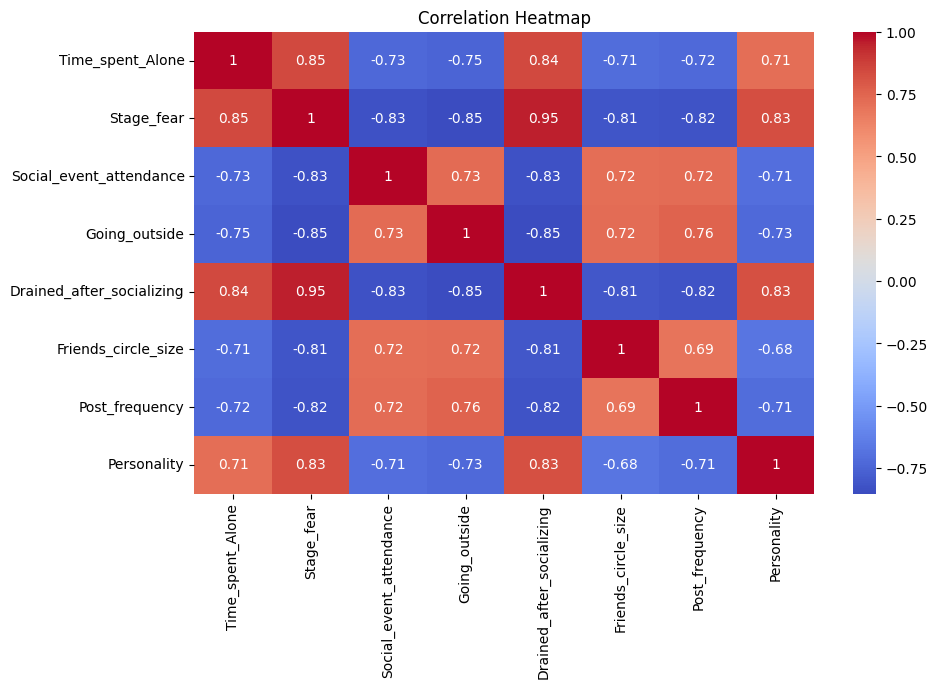

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scaleing

In [125]:
x = data.drop('Personality',axis=1)
y = data['Personality']

In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# modeling

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [107]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LR": LogisticRegression(),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append([name, train_acc, test_acc])

results_d = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
results_d = results_d.sort_values(by="Test Accuracy", ascending=False)

print(results_d)


               Model  Train Accuracy  Test Accuracy
2           AdaBoost        0.916874       0.932406
5                SVC        0.925834       0.932406
3  Gradient Boosting        0.927327       0.932406
4                 LR        0.920358       0.930417
6                KNN        0.929318       0.922465
0      Random Forest        0.979094       0.906561
1      Decision Tree        0.979094       0.856859


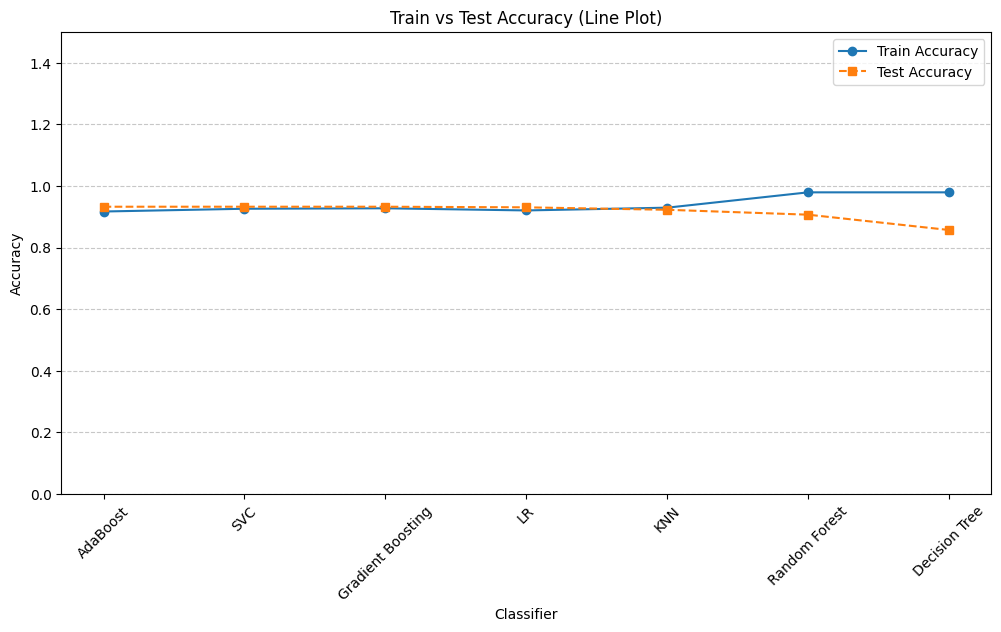

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(results_d["Model"], results_d["Train Accuracy"], marker='o', linestyle='-', label="Train Accuracy")
plt.plot(results_d["Model"], results_d["Test Accuracy"], marker='s', linestyle='--', label="Test Accuracy")

plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy (Line Plot)")
plt.xticks(rotation=45)
plt.ylim(0, 1.5)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [109]:
models_params = {
    "RF": {'n_estimators': [100, 200, 300],'max_depth': [8, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]},
    "DT": {'max_depth': [8, 10, 20, 30],'min_samples_split': [2, 5, 10],'criterion': ['gini', 'entropy']},
    "AdaBoost": {'n_estimators': [50, 100, 200],'learning_rate': [0.01, 0.1, 1.0]},
    "GB": {'n_estimators': [100, 200],'learning_rate': [0.01, 0.1, 0.2],'max_depth': [3, 5, 7]},
    "LR": {'C': [0.01, 0.1, 1, 10],'penalty': ['l1', 'l2'],'solver': ['liblinear']},
    "SVM": {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto']},
    "KNN": {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']}
}

kfold = KFold(n_splits=8, shuffle=True, random_state=42)

best_results = {}

for model_name, params in models_params.items():
    if model_name == "RF":
        model = RandomForestClassifier()
    elif model_name == "LR":
        model = LogisticRegression()
    elif model_name == "GB":
        model = GradientBoostingClassifier()
    elif model_name == "AdaBoost":
        model = AdaBoostClassifier()
    elif model_name == "SVM":
        model = SVC()
    elif model_name == "DT":
        model = DecisionTreeClassifier()
    elif model_name == "KNN":
        model = KNeighborsClassifier()


    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=kfold, n_jobs=-1)
    grid_search.fit(x_train, y_train)

    best_results[model_name] = {
        'Best Params': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }

for name, res in best_results.items():
    print(f"{name}:\n  Best Params: {res['Best Params']}\n  Best Score: {res['Best Score']:.4f}\n")

RF:
  Best Params: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  Best Score: 0.9258

DT:
  Best Params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 10}
  Best Score: 0.9224

AdaBoost:
  Best Params: {'learning_rate': 0.01, 'n_estimators': 100}
  Best Score: 0.9258

GB:
  Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
  Best Score: 0.9263

LR:
  Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
  Best Score: 0.9253

SVM:
  Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
  Best Score: 0.9258

KNN:
  Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
  Best Score: 0.9238



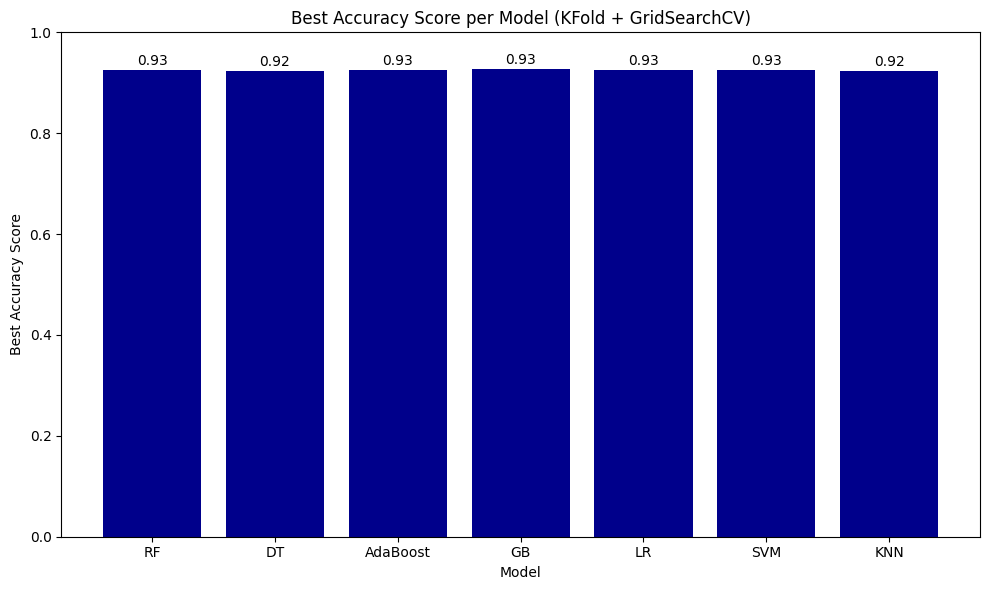

In [110]:
model_names = list(best_results.keys())
best_scores = [best_results[model]['Best Score'] for model in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, best_scores, color='darkblue')
plt.ylim(0, 1)
plt.title("Best Accuracy Score per Model (KFold + GridSearchCV)")
plt.xlabel("Model")
plt.ylabel("Best Accuracy Score")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [111]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=42)
GB.fit(x_train, y_train)
y_pred = GB.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n GradientBoostingClassifier - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")




 GradientBoostingClassifier - Accuracy: 0.93, Precision: 0.92, Recall: 0.92, F1 Score: 0.92


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       282
           1       0.92      0.92      0.92       221

    accuracy                           0.93       503
   macro avg       0.93      0.93      0.93       503
weighted avg       0.93      0.93      0.93       503



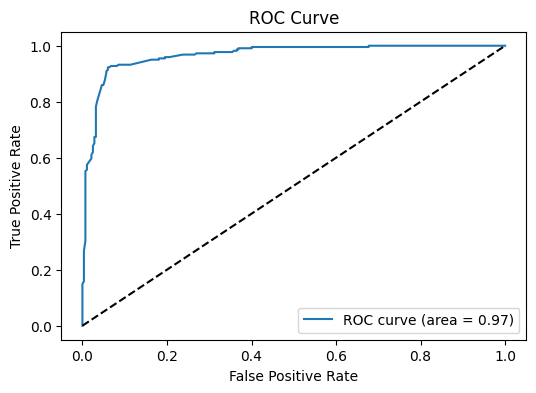

In [67]:
y_prob = GB.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y.unique().max())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()